In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('DATA/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [13]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df['Gender']= df['Gender'].map({'Male':1, 'Female':0})

In [17]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [19]:
df.drop('CustomerID', axis=1, inplace=True)

In [45]:
df_new = df.drop(['Age','Gender'], axis=1)

In [47]:
x_train = df_new.iloc[:170,:]
x_train

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
165,85,75
166,86,20
167,86,95
168,87,27


In [49]:
x_test = df_new.iloc[171:,:]
x_test

,Annual Income (k$),Spending Score (1-100)
171,87,75
172,87,10
173,87,92
174,88,13
175,88,86
176,88,15
177,88,69
178,93,14
179,93,90
180,97,32


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

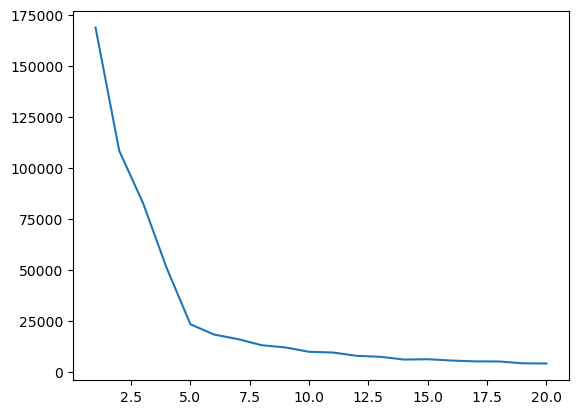

In [51]:
wcss = []
for k in range(1,21) :
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21), wcss)

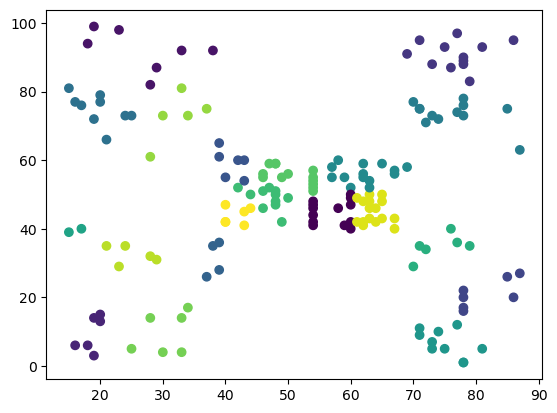

In [59]:
plt.scatter(x_train['Annual Income (k$)'],x_train['Spending Score (1-100)'],c=kmeans.labels_)

In [57]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      170 non-null    int64
 1   Spending Score (1-100)  170 non-null    int64
dtypes: int64(2)
memory usage: 2.8 KB


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


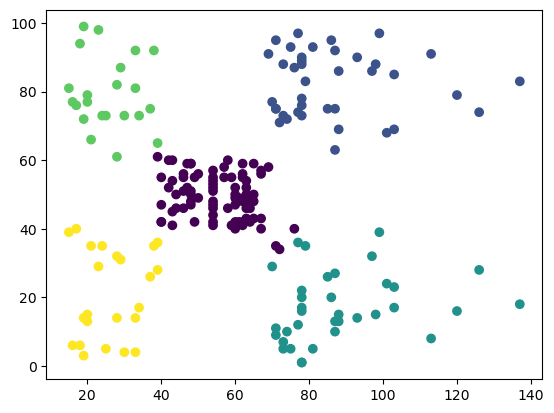

In [63]:
Kmeans = KMeans(n_clusters=5, init='k-means++')
y = Kmeans.fit_predict(df_new)
plt.scatter(df_new['Annual Income (k$)'],df_new['Spending Score (1-100)'],c=y)